In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Cargar datos
Invoice_Purchases = pd.read_csv('/content/InvoicePurchases.csv')

In [4]:
Invoice_Purchases.shape

(5543, 10)

In [5]:
Invoice_Purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [6]:
# Formato Fecha
Invoice_Purchases['InvoiceDate'] = pd.to_datetime(Invoice_Purchases['InvoiceDate'])
Invoice_Purchases.set_index('InvoiceDate', inplace=True)

In [7]:
Invoice_Purchases['PODate'] = pd.to_datetime(Invoice_Purchases['PODate'])
Invoice_Purchases['PayDate'] = pd.to_datetime(Invoice_Purchases['PayDate'])
Invoice_Purchases.head()

,VendorNumber,VendorName,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
InvoiceDate,,,,,,,,,
2016-01-04,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
2016-01-07,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2016-01-09,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
2016-01-12,480,BACARDI USA INC,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
2016-01-07,516,BANFI PRODUCTS CORP,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [11]:
Invoice_Purchases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5543 entries, 2016-01-04 to 2017-01-05
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   PONumber      5543 non-null   int64         
 3   PODate        5543 non-null   datetime64[ns]
 4   PayDate       5543 non-null   datetime64[ns]
 5   Quantity      5543 non-null   int64         
 6   Dollars       5543 non-null   float64       
 7   Freight       5543 non-null   float64       
 8   Approval      374 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 433.0+ KB


In [12]:
#Análisis Estadístico con Pandas y Numpy: propiedades estadísticas del Dataset.
# Calcula medidas de tendencia central, la media, mediana, desviación estándar, mínimo y máximo
#de cada columna

for i in Invoice_Purchases.columns:
    print(i)
    print(Invoice_Purchases[i].describe())
    print('---------------------------------')

VendorNumber
count      5543.00000
mean      20662.75212
std       34582.15841
min           2.00000
25%        3089.00000
50%        7240.00000
75%       10754.00000
max      201359.00000
Name: VendorNumber, dtype: float64
---------------------------------
VendorName
count                            5543
unique                            129
top       MHW LTD                    
freq                               55
Name: VendorName, dtype: object
---------------------------------
PONumber
count     5543.000000
mean     10889.419087
std       1600.859969
min       8106.000000
25%       9503.500000
50%      10890.000000
75%      12275.500000
max      13661.000000
Name: PONumber, dtype: float64
---------------------------------
PODate
count                             5543
mean     2016-06-24 08:48:08.832762112
min                2015-12-20 00:00:00
25%                2016-03-24 12:00:00
50%                2016-06-25 00:00:00
75%                2016-09-23 00:00:00
max                201

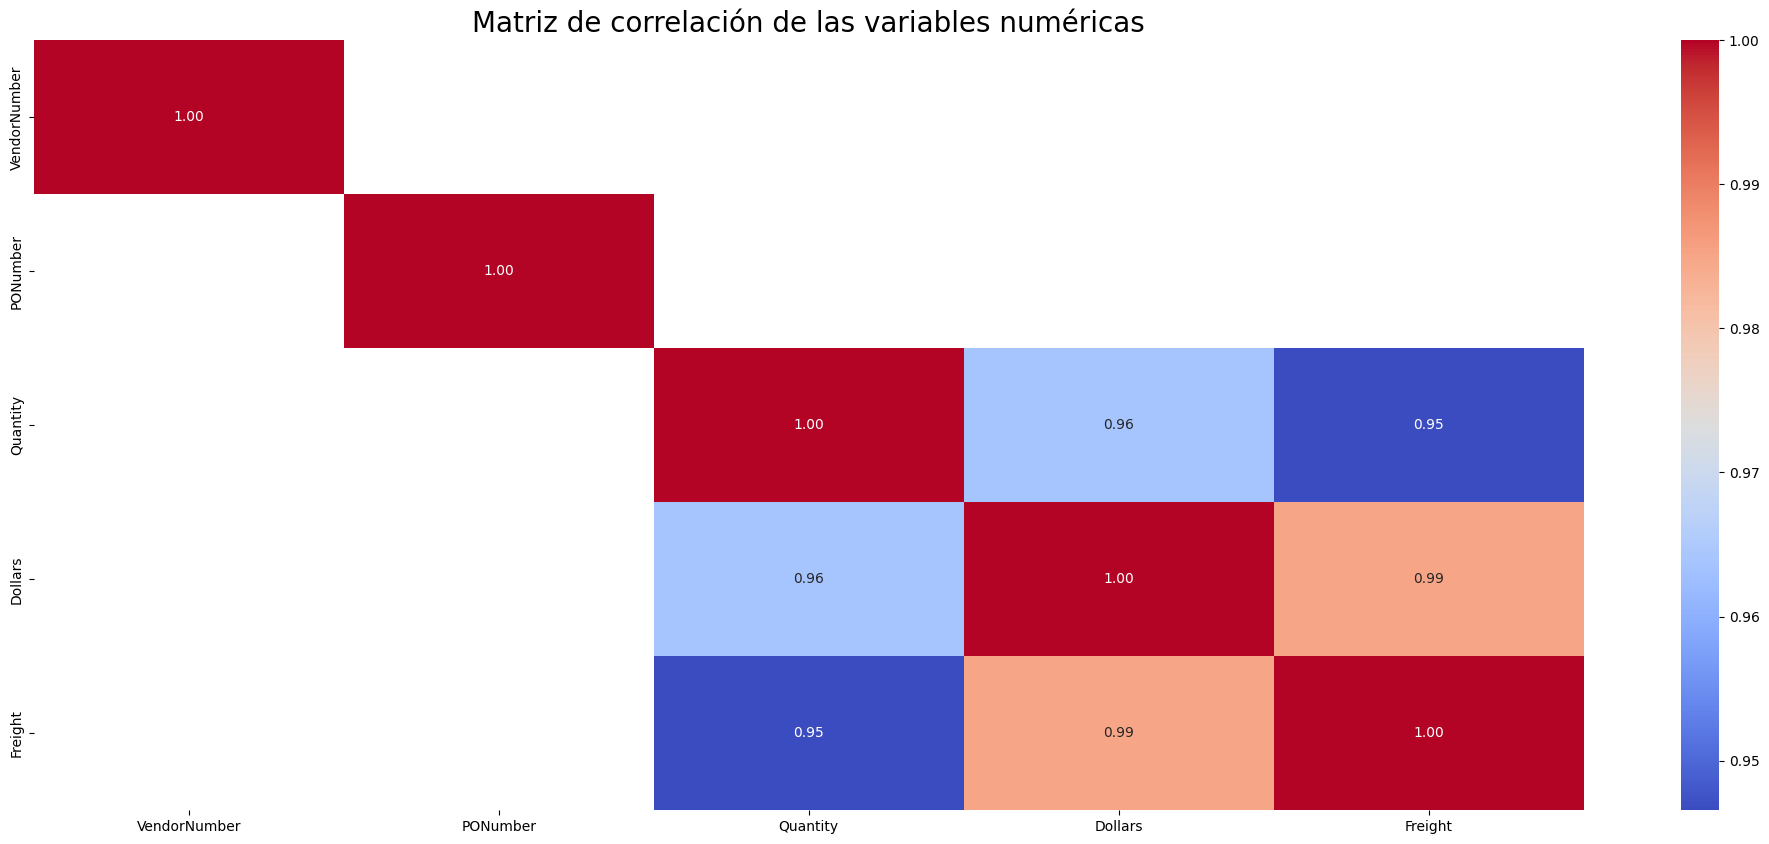

In [13]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = Invoice_Purchases.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = Invoice_Purchases[numeric_columns].corr()

# Vamos a mostrar valores superiores a 0.5 (donde hay una correlación fuerte) OPCIONAL
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

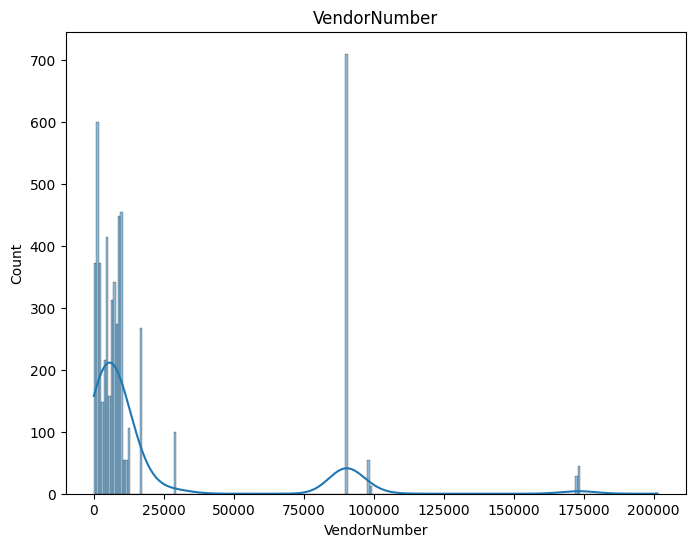

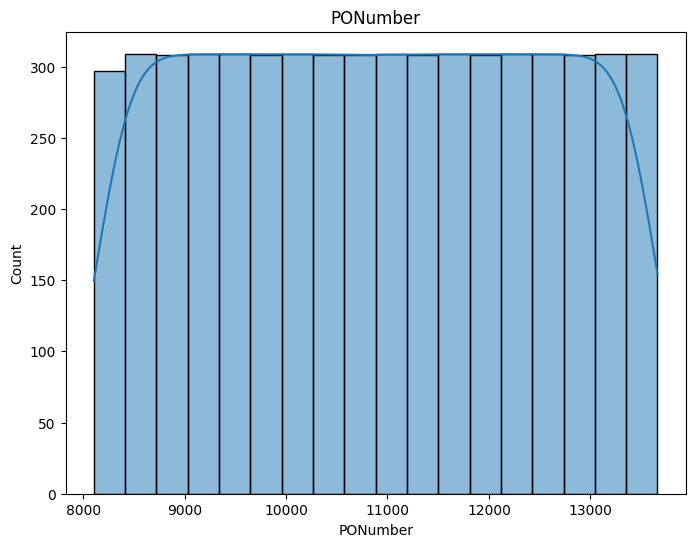

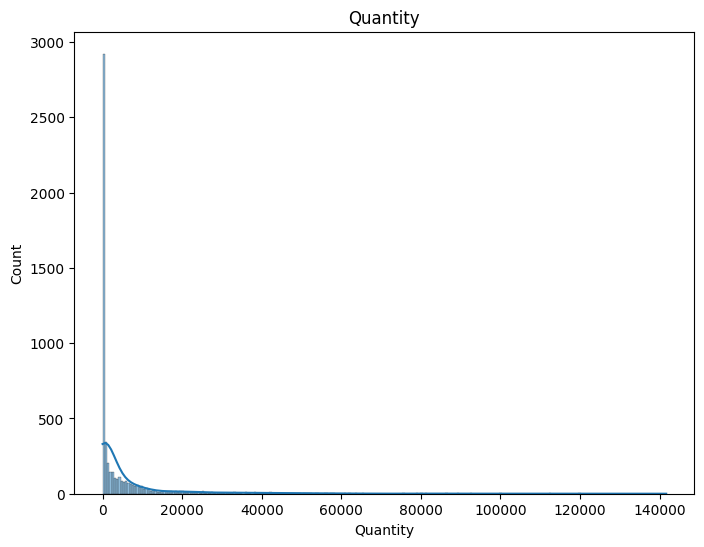

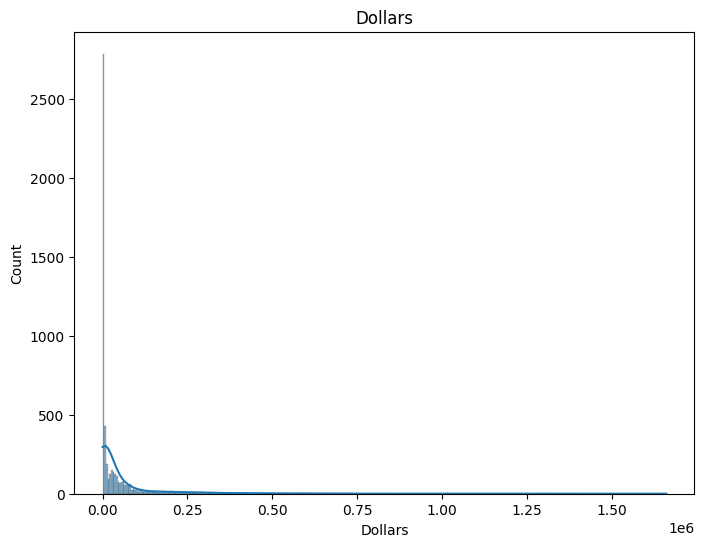

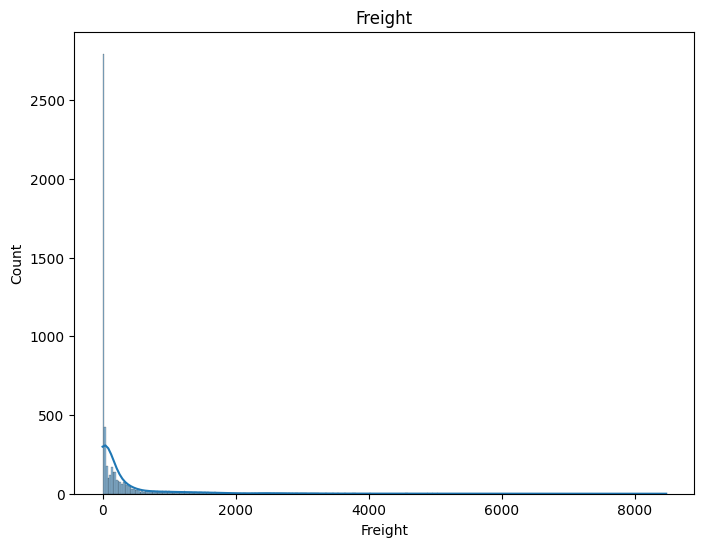

In [14]:
# mismo análisis anterior pero con Histrogramas para ver la distribución de los datos
# hago lista con las columnas que interesan

# Crear histogramas de las variables numéricas
for i in Invoice_Purchases[numeric_columns]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(Invoice_Purchases[i], kde=True)
    plt.title(i)
    plt.show()

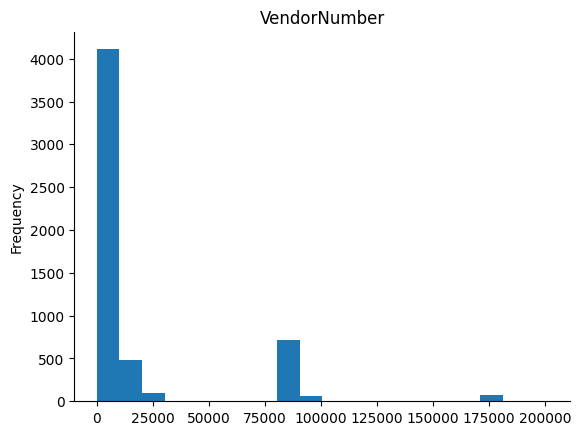

In [8]:
# @title VendorNumber

from matplotlib import pyplot as plt
Invoice_Purchases['VendorNumber'].plot(kind='hist', bins=20, title='VendorNumber')
plt.gca().spines[['top', 'right',]].set_visible(False)

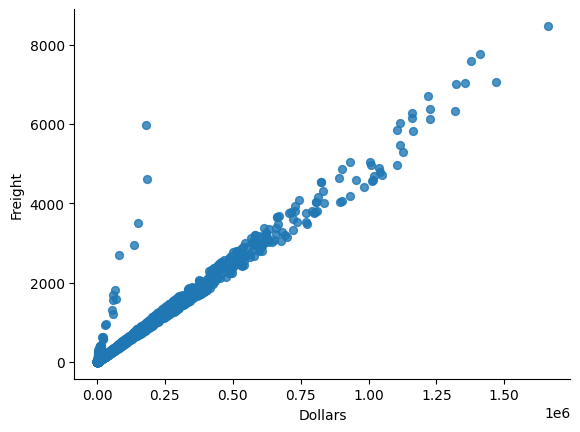

In [10]:
# @title Dollars vs Freight

from matplotlib import pyplot as plt
Invoice_Purchases.plot(kind='scatter', x='Dollars', y='Freight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

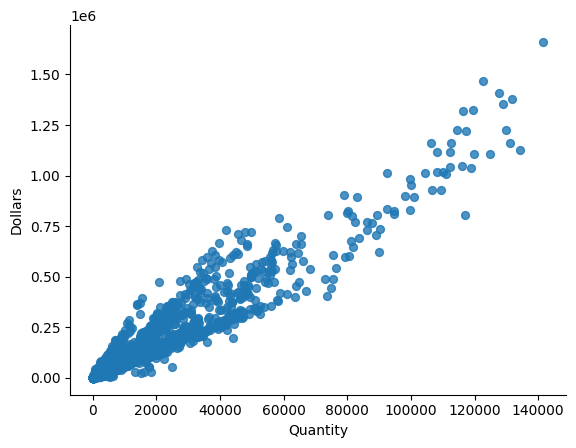

In [9]:
# @title Quantity vs Dollars

from matplotlib import pyplot as plt
Invoice_Purchases.plot(kind='scatter', x='Quantity', y='Dollars', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-16-f90cbeaad706>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dollars = Invoice_Purchases['Dollars'].resample('M').sum()


<Figure size 1200x800 with 0 Axes>

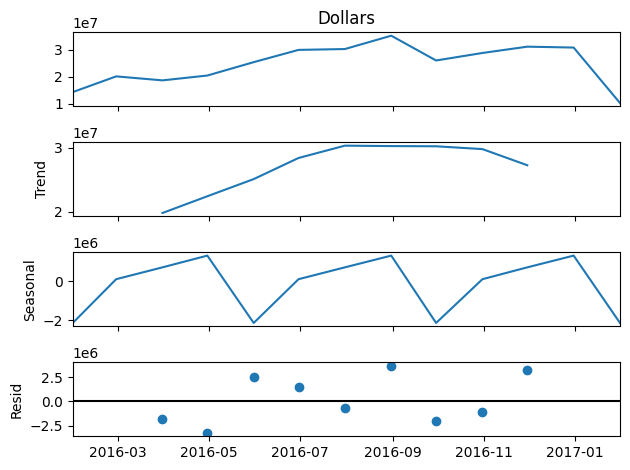

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


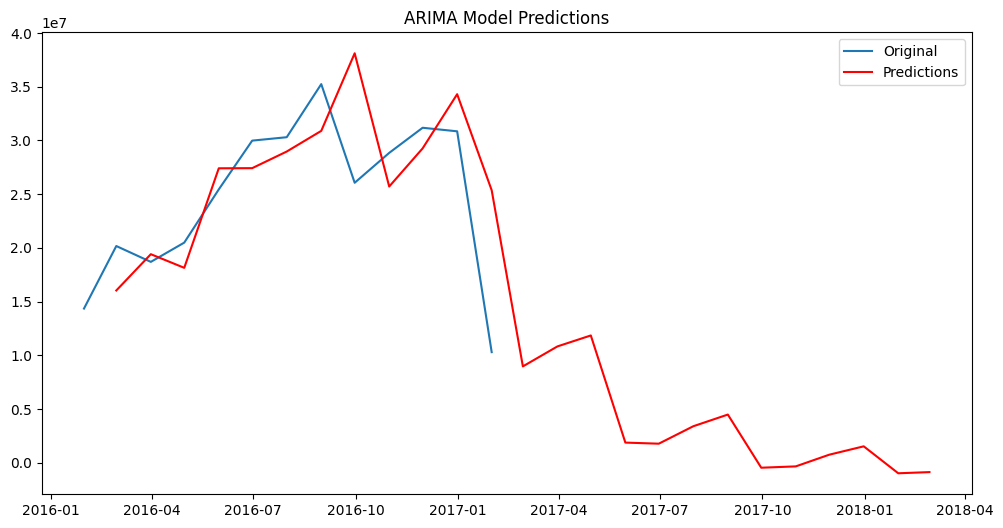

                               SARIMAX Results                                
Dep. Variable:                Dollars   No. Observations:                   13
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -204.969
Date:                Wed, 11 Dec 2024   AIC                            421.938
Time:                        07:14:27   BIC                            424.847
Sample:                    01-31-2016   HQIC                           420.861
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1812      0.649      0.279      0.780      -1.091       1.453
ar.L2         -0.0616      1.034     -0.060      0.952      -2.089       1.965
ar.L3         -0.0512      0.689     -0.074      0.9

In [16]:
# prompt: series temporales

# Time series analysis of 'Dollars'
# Resample the data to a monthly frequency and calculate the sum of 'Dollars' for each month
monthly_dollars = Invoice_Purchases['Dollars'].resample('M').sum()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(monthly_dollars, model='additive', period=4)

# Plot the decomposition components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Fit an ARIMA model to the time series
from statsmodels.tsa.arima.model import ARIMA

# Determine optimal (p, d, q) order for ARIMA model (example)
# In practice, use techniques like ACF/PACF plots and information criteria to find optimal order.
p, d, q = 5, 1, 0  # Example order

model = ARIMA(monthly_dollars, order=(p, d, q))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(monthly_dollars) - 12, end=len(monthly_dollars) + 12)

# Plot the original data and the predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_dollars, label='Original')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()

# Print model summary
print(model_fit.summary())

# Evaluate model performance (example using RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(monthly_dollars[-12:], predictions[:12]))
print('RMSE:', rmse)